In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < y < -2.5; 6 < pT < 8

Y_OS = [350.0, 329.0, 354.0, 367.0, 317.0, 335.0, 337.0, 317.0, 351.0, 339.0, 315.0, 299.0, 345.0, 327.0, 331.0, 318.0, 298.0, 307.0, 297.0, 311.0, 309.0, 284.0, 347.0, 302.0, 268.0, 287.0, 275.0, 274.0, 284.0, 279.0, 279.0, 258.0, 282.0, 253.0, 277.0, 280.0, 231.0, 217.0, 258.0, 259.0, 252.0, 253.0, 249.0, 225.0, 236.0, 203.0, 233.0, 249.0, 240.0, 221.0, 238.0, 221.0, 225.0, 212.0, 225.0, 222.0, 204.0, 225.0, 209.0, 185.0, 197.0, 198.0, 237.0, 242.0, 211.0, 231.0, 275.0, 263.0, 263.0, 323.0, 371.0, 395.0, 516.0, 609.0, 737.0, 946.0, 1138.0, 1281.0, 1481.0, 1586.0, 1527.0, 1489.0, 1190.0, 971.0, 722.0, 509.0, 412.0, 340.0, 253.0, 206.0, 182.0, 155.0, 166.0, 148.0, 127.0, 140.0, 121.0, 115.0, 116.0, 114.0, 100.0, 109.0, 119.0, 112.0, 123.0, 126.0, 112.0, 156.0, 138.0, 124.0, 127.0, 123.0, 113.0, 108.0, 118.0, 93.0, 90.0, 99.0, 94.0, 87.0, 101.0, 89.0, 77.0, 80.0, 91.0, 78.0, 73.0, 86.0, 94.0, 93.0, 83.0, 64.0, 93.0, 89.0, 87.0, 74.0, 76.0, 79.0, 65.0, 90.0, 66.0, 82.0, 79.0, 83.0, 67.0, 74.0, 62.0, 83.0, 68.0, 71.0, 90.0, 70.0, 66.0, 64.0, 61.0, 79.0, 74.0, 78.0, 50.0, 58.0, 58.0, 68.0, 68.0, 61.0, 63.0, 61.0, 59.0, 60.0, 52.0, 54.0, 60.0, 69.0, 57.0, 59.0, 63.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [75.0, 68.0, 56.0, 84.0, 80.0, 70.0, 81.0, 80.0, 66.0, 69.0, 67.0, 68.0, 78.0, 77.0, 72.0, 68.0, 60.0, 73.0, 66.0, 63.0, 66.0, 72.0, 66.0, 79.0, 73.0, 58.0, 66.0, 69.0, 47.0, 62.0, 83.0, 82.0, 53.0, 78.0, 72.0, 79.0, 45.0, 59.0, 64.0, 55.0, 71.0, 56.0, 64.0, 65.0, 77.0, 47.0, 65.0, 68.0, 67.0, 69.0, 72.0, 67.0, 78.0, 73.0, 49.0, 74.0, 51.0, 58.0, 70.0, 70.0, 73.0, 66.0, 69.0, 62.0, 70.0, 58.0, 64.0, 56.0, 57.0, 54.0, 70.0, 56.0, 75.0, 55.0, 46.0, 51.0, 65.0, 61.0, 54.0, 52.0, 49.0, 53.0, 51.0, 48.0, 61.0, 64.0, 48.0, 52.0, 62.0, 69.0, 55.0, 58.0, 65.0, 59.0, 61.0, 42.0, 53.0, 58.0, 59.0, 63.0, 53.0, 52.0, 61.0, 59.0, 54.0, 61.0, 49.0, 55.0, 67.0, 59.0, 52.0, 67.0, 37.0, 45.0, 45.0, 48.0, 55.0, 64.0, 66.0, 56.0, 60.0, 63.0, 57.0, 48.0, 54.0, 48.0, 65.0, 69.0, 66.0, 62.0, 56.0, 62.0, 72.0, 52.0, 48.0, 56.0, 48.0, 52.0, 56.0, 56.0, 58.0, 52.0, 43.0, 41.0, 60.0, 59.0, 52.0, 48.0, 45.0, 50.0, 46.0, 51.0, 38.0, 57.0, 52.0, 47.0, 49.0, 44.0, 45.0, 45.0, 48.0, 44.0, 44.0, 52.0, 40.0, 47.0, 33.0, 47.0, 44.0, 43.0, 48.0, 40.0, 46.0, 32.0, 47.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [2.0, 3.0, 5.0, 1.0, 3.0, 2.0, 4.0, 3.0, 6.0, 4.0, 5.0, 3.0, 5.0, 3.0, 2.0, 3.0, 7.0, 10.0, 6.0, 4.0, 6.0, 9.0, 6.0, 6.0, 9.0, 9.0, 13.0, 11.0, 15.0, 11.0, 13.0, 13.0, 10.0, 14.0, 18.0, 9.0, 18.0, 16.0, 11.0, 21.0, 21.0, 19.0, 25.0, 21.0, 24.0, 20.0, 29.0, 31.0, 31.0, 41.0, 41.0, 28.0, 33.0, 55.0, 45.0, 55.0, 59.0, 70.0, 77.0, 89.0, 102.0, 132.0, 127.0, 148.0, 172.0, 197.0, 209.0, 267.0, 337.0, 426.0, 507.0, 654.0, 882.0, 1164.0, 1494.0, 2097.0, 2715.0, 3679.0, 4512.0, 5137.0, 5091.0, 4548.0, 3619.0, 2560.0, 1637.0, 961.0, 548.0, 377.0, 214.0, 133.0, 74.0, 59.0, 57.0, 39.0, 30.0, 19.0, 12.0, 13.0, 11.0, 12.0, 14.0, 6.0, 7.0, 0.0, 2.0, 4.0, 1.0, 3.0, 3.0, 0.0, 6.0, 2.0, 0.0, 3.0, 4.0, 2.0, 0.0, 1.0, 4.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 4.0, 1.0, 1.0, 2.0, 1.0, 2.0, 0.0, 1.0, 0.0, 3.0, 3.0, 3.0, 5.0, 3.0, 2.0, 2.0, 5.0, 5.0, 4.0, 3.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 4.0, 6.0, 5.0, 7.0, 3.0, 3.0, 4.0, 2.0, 2.0, 5.0, 5.0, 6.0, 9.0, 4.0, 11.0, 8.0, 8.0, 5.0, 17.0, 8.0, 12.0, 14.0, 15.0, 6.0, 19.0, 11.0, 20.0, 8.0, 19.0, 22.0, 16.0, 27.0, 26.0, 31.0, 24.0, 40.0, 36.0, 41.0, 50.0, 47.0, 67.0, 71.0, 91.0, 86.0, 93.0, 153.0, 139.0, 139.0, 215.0, 215.0, 305.0, 377.0, 485.0, 653.0, 810.0, 1085.0, 1312.0, 1720.0, 1996.0, 2207.0, 2119.0, 1869.0, 1489.0, 1005.0, 675.0, 407.0, 243.0, 150.0, 87.0, 56.0, 48.0, 29.0, 16.0, 13.0, 8.0, 12.0, 14.0, 6.0, 10.0, 5.0, 6.0, 6.0, 5.0, 5.0, 3.0, 0.0, 2.0, 1.0, 2.0, 2.0, 2.0, 0.0, 5.0, 1.0, 0.0, 1.0, 3.0, 1.0, 1.0, 2.0, 1.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [3.0, 3.0, 6.0, 1.0, 3.0, 2.0, 4.0, 3.0, 7.0, 6.0, 6.0, 4.0, 6.0, 3.0, 2.0, 7.0, 8.0, 11.0, 8.0, 5.0, 8.0, 9.0, 7.0, 6.0, 12.0, 12.0, 16.0, 16.0, 18.0, 13.0, 15.0, 18.0, 15.0, 18.0, 21.0, 10.0, 20.0, 18.0, 13.0, 22.0, 23.0, 21.0, 27.0, 24.0, 28.0, 24.0, 31.0, 33.0, 35.0, 45.0, 45.0, 34.0, 38.0, 62.0, 48.0, 58.0, 63.0, 72.0, 79.0, 94.0, 107.0, 138.0, 136.0, 152.0, 183.0, 205.0, 217.0, 272.0, 354.0, 434.0, 519.0, 668.0, 897.0, 1170.0, 1513.0, 2108.0, 2735.0, 3687.0, 4531.0, 5159.0, 5107.0, 4575.0, 3645.0, 2591.0, 1661.0, 1001.0, 584.0, 418.0, 264.0, 180.0, 141.0, 130.0, 148.0, 125.0, 123.0, 172.0, 151.0, 152.0, 226.0, 227.0, 319.0, 383.0, 492.0, 653.0, 812.0, 1089.0, 1313.0, 1723.0, 1999.0, 2207.0, 2125.0, 1871.0, 1489.0, 1008.0, 679.0, 409.0, 243.0, 151.0, 91.0, 57.0, 50.0, 30.0, 17.0, 15.0, 10.0, 13.0, 17.0, 7.0, 11.0, 6.0, 6.0, 7.0, 5.0, 6.0, 4.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 0.0, 5.0, 2.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0, 2.0, 0.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 67434.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

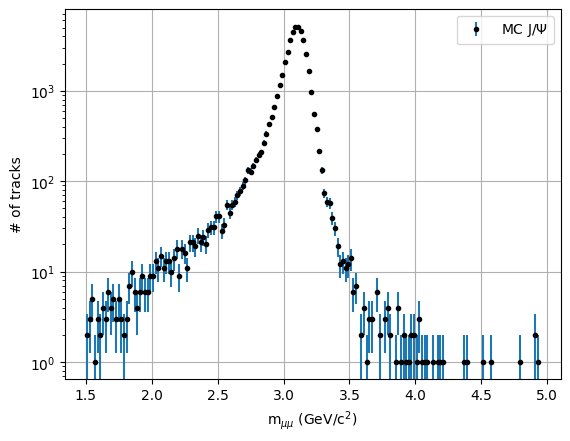

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [5134.038822641239, 3.098012980348565, 0.061542590648963384, 1.1310803218792849, 3.0491483245562256, 1.9202041252060775, 3.746954806916635]
pcov: 
 [[ 1.55925056e+03  3.89956293e-03 -1.31444237e-02 -1.16706096e-01
   9.67810392e-02 -4.27505352e-01  1.45154358e+00]
 [ 3.89956293e-03  2.31369005e-07 -1.04347052e-07 -4.71001250e-06
   1.32980945e-05 -1.78630617e-08 -6.92158895e-06]
 [-1.31444237e-02 -1.04347052e-07  2.51746774e-07  5.47482310e-06
  -1.07824524e-05  1.09550343e-05 -3.71437898e-05]
 [-1.16706096e-01 -4.71001250e-06  5.47482310e-06  3.69681628e-04
  -1.37949621e-03  2.11049833e-04 -6.34592640e-04]
 [ 9.67810392e-02  1.32980945e-05 -1.07824524e-05 -1.37949621e-03
   7.42556044e-03 -3.40072682e-04  8.50704344e-04]
 [-4.27505352e-01 -1.78630617e-08  1.09550343e-05  2.11049833e-04
  -3.40072682e-04  2.34473866e-03 -1.35967423e-02]
 [ 1.45154358e+00 -6.92158895e-06 -3.71437898e-05 -6.34592640e-04
   8.50704344e-04 -1.35967423e-02  1.06150829e-01]]
residual: 
 {'nfev': 10,

fit error : 39.48881937216902


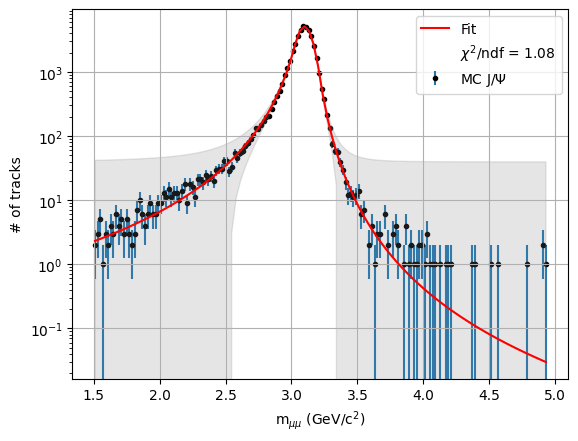

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

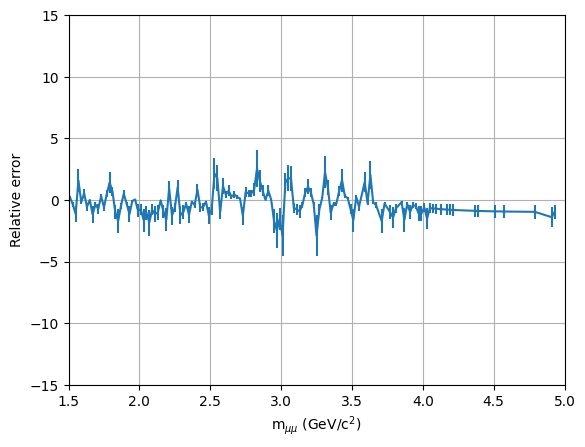

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

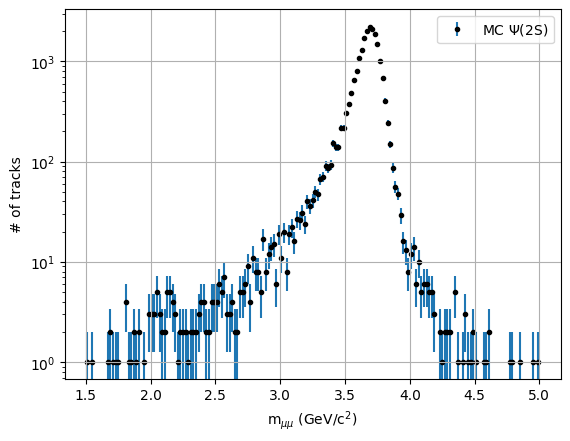

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [2168.383458184554, 3.6916410649536737, 0.06537874430753779, 1.0387648488567551, 3.2654509583106393, 2.1230789142749256, 2.4711428370897495]
pcov: 
 [[ 5.49364062e+02  4.54194575e-03 -1.12026956e-02 -7.55584626e-02
   1.02479352e-02 -2.64681423e-01  6.05822667e-01]
 [ 4.54194575e-03  6.32950362e-07 -3.31769756e-07 -1.19819795e-05
   3.71644510e-05 -3.30657521e-06  3.66459762e-07]
 [-1.12026956e-02 -3.31769756e-07  5.65559096e-07  1.15040536e-05
  -2.61057558e-05  1.81440638e-05 -3.75902733e-05]
 [-7.55584626e-02 -1.19819795e-05  1.15040536e-05  6.63249260e-04
  -2.78083414e-03  3.33291767e-04 -6.02037428e-04]
 [ 1.02479352e-02  3.71644510e-05 -2.61057558e-05 -2.78083414e-03
   1.68990345e-02 -6.35913345e-04  9.59245901e-04]
 [-2.64681423e-01 -3.30657521e-06  1.81440638e-05  3.33291767e-04
  -6.35913345e-04  4.77506712e-03 -1.69892062e-02]
 [ 6.05822667e-01  3.66459762e-07 -3.75902733e-05 -6.02037428e-04
   9.59245901e-04 -1.69892062e-02  7.78473235e-02]]
residual: 
 {'nfev': 9,

fit error : 23.44065373602805


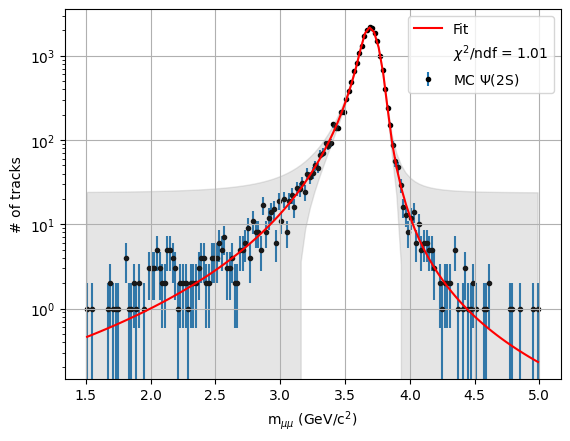

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

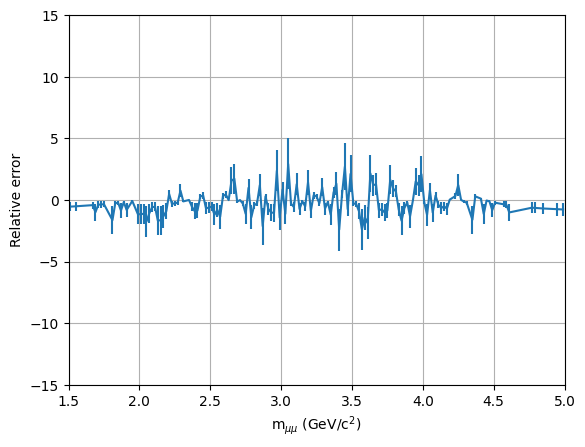

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

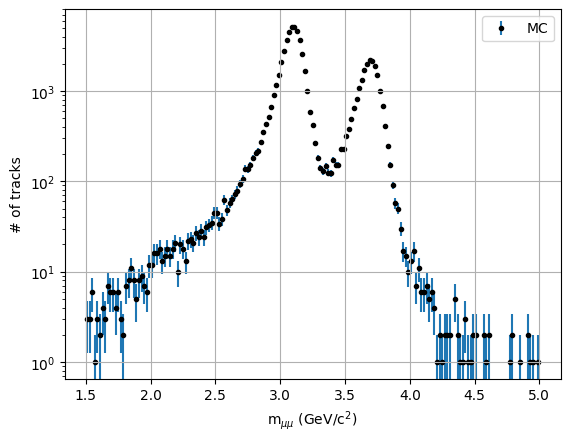

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [5128.2945176409285, 3.0979587769138837, 0.06168081314001777, 2166.1604285388084, 3.6916607786231994, 0.0655421973017373]
pcov: 
 [[ 1.59241456e+03  2.54328126e-03 -1.02483915e-02 -6.51725899e+00
  -4.18451669e-04  5.75782734e-04]
 [ 2.54328126e-03  1.78322781e-07 -2.94643672e-08  4.00373708e-05
   2.94602162e-09 -3.51304681e-09]
 [-1.02483915e-02 -2.94643672e-08  1.28366015e-07  2.37702848e-04
   1.21589642e-08 -1.82836683e-08]
 [-6.51725899e+00  4.00373708e-05  2.37702848e-04  6.23964848e+02
   3.56667513e-03 -1.03749301e-02]
 [-4.18451669e-04  2.94602162e-09  1.21589642e-08  3.56667513e-03
   4.74714946e-07 -1.25217131e-07]
 [ 5.75782734e-04 -3.51304681e-09 -1.82836683e-08 -1.03749301e-02
  -1.25217131e-07  3.41281647e-07]]
residual: 
 {'nfev': 4, 'fvec': array([-0.12273861, -0.06530761, -1.2283554 ,  2.10052101,  0.12430053,
        0.94456559, -0.26877249,  0.34387096, -1.23379549, -0.86419608,
       -0.80076736,  0.1011628 , -0.66334877,  0.8992723 ,  1.94480191,
       

fit error : 47.07843890249421


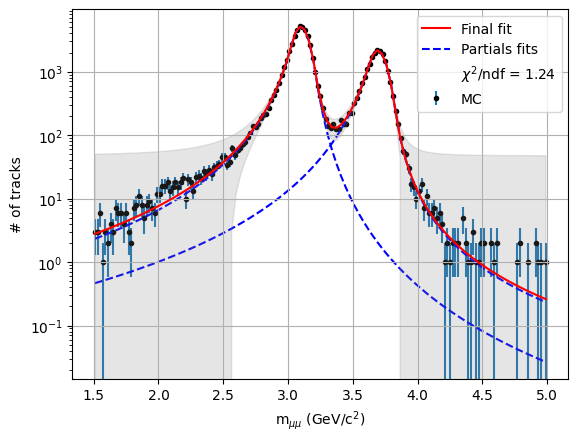

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_14048/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


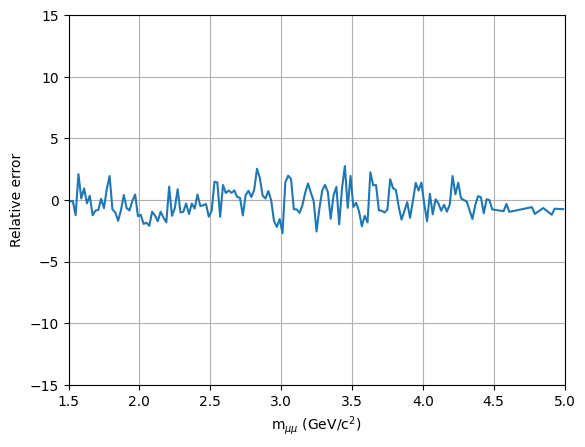

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

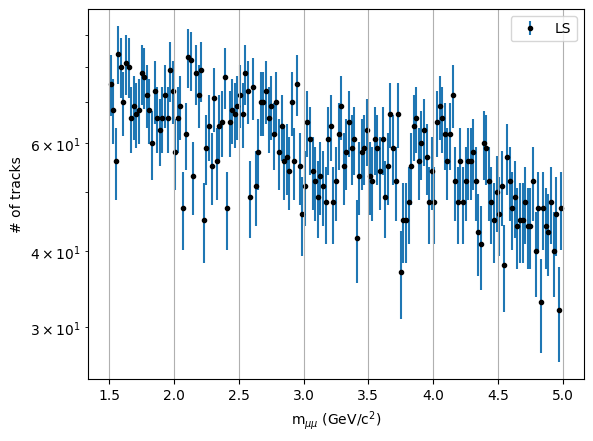

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [4.272266767508931, 4.133524549782063, 4.023639365470835, 4.011509140755802, 3.6503890880619365]
pcov: 
 [[ 1.95091266e-03 -3.39053589e-04  2.32573736e-04  1.42102262e-04
   3.50471237e-04]
 [-3.39053589e-04  3.57719175e-04  1.32719495e-05 -3.30857140e-05
  -1.97622408e-05]
 [ 2.32573736e-04  1.32719495e-05  4.18262281e-04  2.86278501e-04
   1.58277849e-04]
 [ 1.42102262e-04 -3.30857140e-05  2.86278501e-04  3.44109651e-04
  -2.92156225e-04]
 [ 3.50471237e-04 -1.97622408e-05  1.58277849e-04 -2.92156225e-04
   3.62550658e-03]]
residual: 
 {'nfev': 16, 'fvec': array([-0.39076105,  0.42164086,  2.04911828, -1.39792508, -1.00199485,
        0.10572521, -1.1413387 , -1.05450954,  0.54226308,  0.14923394,
        0.37519361,  0.23039315, -0.93683648, -0.84902332, -0.30979682,
        0.14437042,  1.16288037, -0.48890752,  0.32447432,  0.68632731,
        0.27786933, -0.46365537,  0.23050878, -1.27379579, -0.64575796,
        1.21930204,  0.13395058, -0.25405959,  2.87211672,  0.570252

fit error : 0.08183220848311244


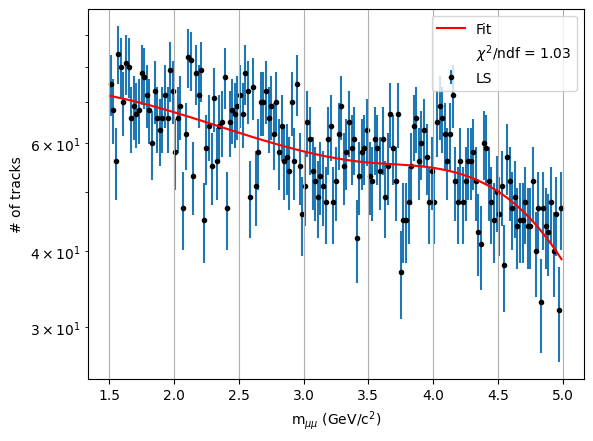

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

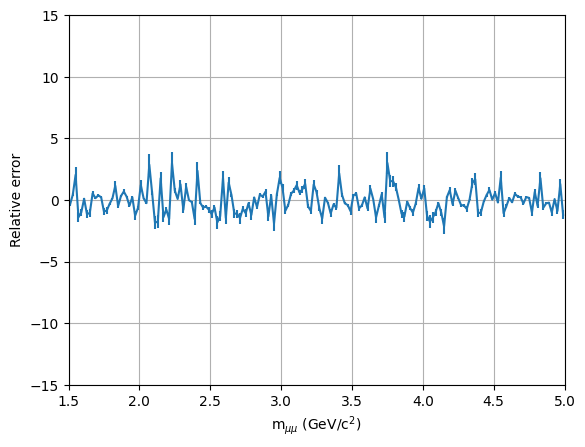

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

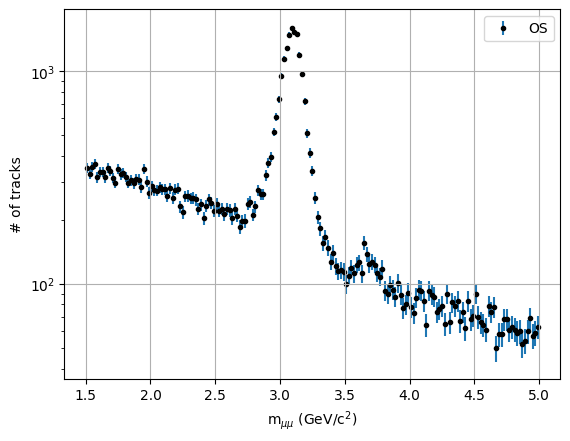

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [1509.7707853485852, 3.0956844697211925, 0.06769684971385971, 30.00022278355226, 3.684715100074901, 0.05884086993383861, 5.865682079041676, 5.354759122404347, 4.758078950969192, 4.5629694885655345, 4.055030880970718]
pcov: 
 [[ 5.41915620e+02  3.05179192e-03 -1.49137990e-02  5.03803829e-01
  -3.94178482e-03  8.56676045e-03 -9.24792616e-03  4.97650915e-03
  -1.27951798e-02 -7.77538433e-03 -9.43264652e-03]
 [ 3.05179192e-03  1.04726520e-06 -2.65029172e-07 -7.79995236e-05
   3.62493091e-07 -8.50678153e-07 -3.97420660e-07  1.94381127e-06
   2.56649249e-06  1.17996477e-06  1.88066018e-06]
 [-1.49137990e-02 -2.65029172e-07  1.19686512e-06  7.79595641e-04
  -1.35821794e-06  3.83428527e-06 -2.49689752e-06 -5.98875812e-06
  -1.49979234e-05 -8.90056683e-06 -7.31727691e-06]
 [ 5.03803829e-01 -7.79995236e-05  7.79595641e-04  6.21442560e+01
   7.05010402e-03 -7.29932430e-02 -1.35683368e-02 -8.22472812e-03
  -4.67514547e-02 -3.84378570e-02  4.64215813e-03]
 [-3.94178482e-03  3.62493091e-07 -

fit error : 24.577763049887285


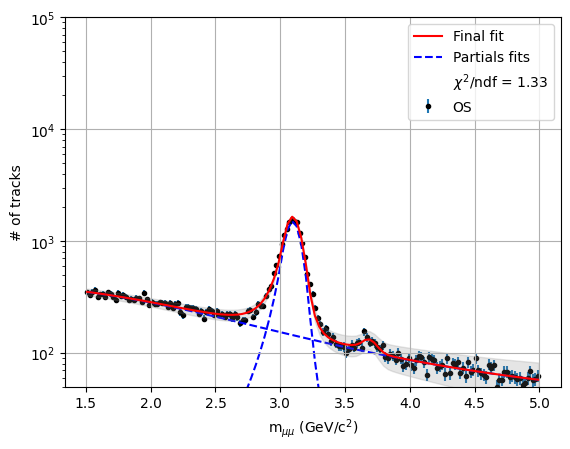

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

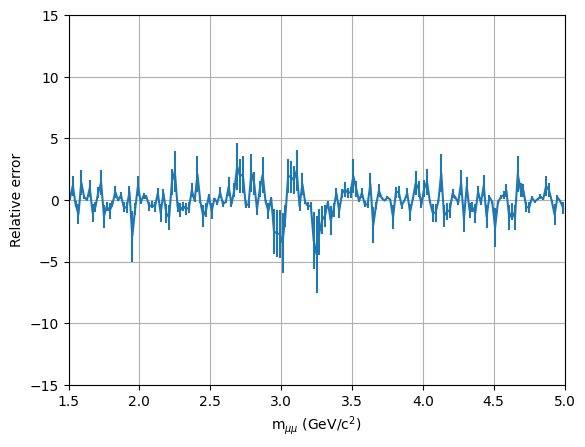

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  14889.612962825551  +/-  349.46083068740734 (stat.)
